In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('churn-bigml-80.csv')

In [16]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [18]:
df.duplicated().sum()

0

In [19]:
df['Area code'].value_counts()

415    1318
510     679
408     669
Name: Area code, dtype: int64

In [20]:
df['State'].value_counts()

WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

In [21]:
df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [22]:
def preprocessing(df):
    df['Area code'] = df['Area code'].astype(str)
    df.drop('State',axis=1,inplace=True)
    df['Churn'] = df['Churn'].map({False:0,True:1})

In [23]:
preprocessing(df)


In [24]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [27]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [28]:
X = pd.get_dummies(X)

In [30]:
y.value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
ros = RandomOverSampler()
X_ros,y_ros = ros.fit_resample(X,y)
y_ros.value_counts()

0    2278
1    2278
Name: Churn, dtype: int64

In [32]:
X_ros.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Total intl calls,Total intl charge,Customer service calls,Area code_408,Area code_415,Area code_510,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,3,2.70,1,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3,3.70,1,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,5,3.29,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,7,1.78,2,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,3,2.73,3,0,1,0,0,1,1,0


In [34]:
col = X_ros.columns

## Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_ros = scaler.fit_transform(X_ros)
X_ros = pd.DataFrame(X_ros,columns=col)
X_ros.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Total intl calls,Total intl charge,Customer service calls,Area code_408,Area code_415,Area code_510,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,0.662975,1.423721,1.222003,0.450196,1.222225,-0.122018,-0.056375,-0.121838,0.845123,-0.480176,...,-0.521834,-0.168743,-0.541166,-0.565860,0.996932,-0.586475,0.475447,-0.475447,-1.858378,1.858378
1,0.137424,1.501410,-0.449544,1.073484,-0.449783,-0.159133,0.144676,-0.158609,1.041517,0.127429,...,-0.521834,1.162751,-0.541166,-0.565860,0.996932,-0.586475,0.475447,-0.475447,-1.858378,1.858378
2,0.888211,-0.518523,0.871543,0.641977,0.871673,-1.610542,0.496516,-1.611082,-0.817138,0.178063,...,0.303392,0.616839,-1.153118,-0.565860,0.996932,-0.586475,0.475447,-0.475447,0.538104,-0.538104
3,-0.438179,-0.518523,1.775956,-1.419665,1.776078,-2.768934,-0.609265,-2.769384,-0.122674,-0.581444,...,1.128617,-1.393717,0.070785,1.767223,-1.003078,-0.586475,-2.103285,2.103285,0.538104,-0.538104
4,-0.663414,-0.518523,-0.367178,0.594032,-0.367133,-1.081159,1.099669,-1.080194,-0.325141,1.038837,...,-0.521834,-0.128798,0.682737,-0.565860,0.996932,-0.586475,-2.103285,2.103285,0.538104,-0.538104


In [36]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Creating a sequential Model

In [80]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim=22))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                253       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 7)                 84        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [92]:
history = model.fit(X_ros,y_ros,epochs=100,validation_split=0.2)

Epoch 1/100
114/114 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.9597 - val_loss: 0.1424 - val_accuracy: 0.9419
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 0.9561 - val_loss: 0.1314 - val_accuracy: 0.9561
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9580 - val_loss: 0.1766 - val_accuracy: 0.9287
Epoch 4/100
114/114 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.9608 - val_loss: 0.2048 - val_accuracy: 0.9167
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 0.1147 - accuracy: 0.9569 - val_loss: 0.1633 - val_accuracy: 0.9375
Epoch 6/100
114/114 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9569 - val_loss: 0.1391 - val_accuracy: 0.9430
Epoch 7/100
114/114 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9572 - val_loss: 0.1193 - val_accuracy: 0.9485

In [93]:
history.history

{'loss': [0.11281048506498337,
  0.11346624791622162,
  0.1123582273721695,
  0.11245661228895187,
  0.11473719030618668,
  0.11154528707265854,
  0.11237127333879471,
  0.11039353907108307,
  0.10822980850934982,
  0.11122550815343857,
  0.11083591729402542,
  0.11134030669927597,
  0.1089952290058136,
  0.10940591245889664,
  0.1082882210612297,
  0.10779111087322235,
  0.1071302592754364,
  0.10889146476984024,
  0.11281689256429672,
  0.11122201383113861,
  0.10871787369251251,
  0.10739394277334213,
  0.10784371197223663,
  0.10812903940677643,
  0.10789955407381058,
  0.10748164355754852,
  0.10793711990118027,
  0.10531455278396606,
  0.10504040867090225,
  0.10651526600122452,
  0.10768696665763855,
  0.10417567193508148,
  0.10602332651615143,
  0.10421359539031982,
  0.10381260514259338,
  0.10304594039916992,
  0.10686339437961578,
  0.10661011934280396,
  0.10474149882793427,
  0.10403964668512344,
  0.10239576548337936,
  0.101578488945961,
  0.10146164149045944,
  0.10221

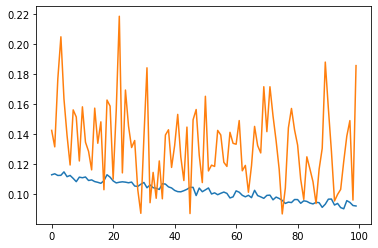

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

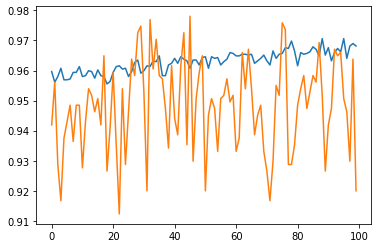

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Predicting on Test Data

In [84]:
df_test = pd.read_csv('churn-bigml-20.csv')

In [85]:
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [69]:
preprocessing(df_test)

In [70]:
df_test.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [71]:
X_test = df_test.drop('Churn',axis=1)
y_test = df_test['Churn']
X_test = pd.get_dummies(X)
X_test = scaler.fit_transform(X)
X_test = pd.DataFrame(X,columns=col)

In [73]:
X_test.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Total intl calls,Total intl charge,Customer service calls,Area code_408,Area code_415,Area code_510,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,0.347127,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,...,-0.212747,-0.547714,-0.423098,1.716609,-1.01055,-0.564076,0.293801,-0.293801,0.628806,-0.628806
1,-0.927731,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,...,0.593516,0.877843,1.828550,-0.582544,0.98956,-0.564076,0.293801,-0.293801,0.628806,-0.628806
2,1.425853,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,...,1.802910,-1.722480,1.828550,-0.582544,0.98956,-0.564076,0.293801,-0.293801,0.628806,-0.628806
3,0.200028,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,...,0.593516,-0.904104,0.327451,-0.582544,0.98956,-0.564076,0.293801,-0.293801,0.628806,-0.628806
4,-1.319994,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,...,-1.422141,0.310260,-0.423098,-0.582544,-1.01055,1.772811,0.293801,-0.293801,0.628806,-0.628806


In [86]:
y_test.value_counts()

0    572
1     95
Name: Churn, dtype: int64

## Predictions

In [87]:
y_log = model.predict(X_test)

21/21 [==============================] - 0s 796us/step


### Converting Pred Probabilities into Outputs

In [88]:
y_pred = np.where(y_log>0.5,1,0)

In [77]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
    

## Evaluation

In [89]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.8170914542728636

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       572
           1       0.43      0.87      0.58        95

    accuracy                           0.82       667
   macro avg       0.70      0.84      0.73       667
weighted avg       0.90      0.82      0.84       667

